# SPRINT 7 - Algoritmes d’aprenentatge supervisat: Classificació



-Objectius específics:

Conocer variables y técnicas de Clasificación (Árboles de clasificación, K – Nearest Neightbours, Regresión Logística, Support Vector Machine, XGBoost).
Evaluar modelos de clasificación. 

## Exercici 1

### Crea por lo menos dos modelos de clasificación diferentes para intentar predecir lo mejor las clases del archivo adjunto.

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats

columnas = ['Types of wine','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids',
            'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
            'OD280/OD315 of diluted wines','Proline'] 
df=pd.read_csv('wineData.txt', sep=',', encoding='latin-1', names=columnas)
df

,Types of wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


**Valores de las columnas**

Types of wine : Clase Categorica del Vino ( Clase - 1 / 2 / 3).

Alcohol: Cantidad de Alcholol en ese tipo de vino.

Malic acid: Cantidad de ácido málico en ese tipo de vino.

Ash: Cantidad de Ceniza en ese tipo de vino.

Alcalinity of ash: Cantidad de Alcalinidad de la ceniza en ese tipo de vino.

Magnesium: Cantidad de Magnesio en ese tipo de vino.

Total phenols: Cantidad de fenol en ese tipo de vino.

Flavonoides: Cantidad de flavonoides en ese tipo de vino.

Nonflavanoid phenols: Cantidad de fenoles no flavonoides en ese tipo de vino.

Proantocianinas : Cantidad de Proantocianinas en ese tipo de vino.

Color intensity: Cantidad de intensidad de color para ese tipo de vino.

Hue: Cantidad de Matiz para ese tipo de vino.

OD280/OD315 of diluted wines: Cantidad de diluido en ese tipo de vino.

Proline : Cantidad de Prolina en ese tipo de vino.

<AxesSubplot: xlabel='Types of wine', ylabel='count'>

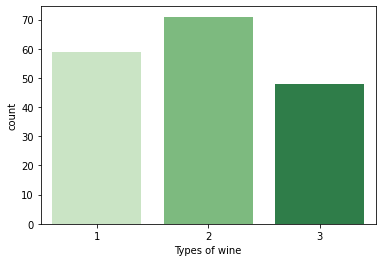

In [4]:
sns.countplot(data=df, x= 'Types of wine', palette='Greens')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Types of wine                 178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [6]:
df.dtypes

Types of wine                     int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [7]:
df.describe()

,Types of wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
df.isna().sum().sort_values(ascending = False)

Types of wine                   0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [9]:
df.isnull().sum().sort_values(ascending = False)

Types of wine                   0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

Analizaremos cuales de las columnas a estudiar son gaussianas y cuales no, para saber luego como estudiarlas:

In [11]:
import scipy.stats as stats

threshold = 0.05

for column in df.columns:
    k2, p = stats.normaltest(df[column])
    if p < threshold:
        print(f"La columna {column} no es gaussiana (p = {p:.3f})")
    else:
        print(f"La columna {column} es gaussiana (p = {p:.3f})")

La columna Types of wine no es gaussiana (p = 0.000)
La columna Alcohol no es gaussiana (p = 0.000)
La columna Malic acid no es gaussiana (p = 0.000)
La columna Ash no es gaussiana (p = 0.036)
La columna Alcalinity of ash es gaussiana (p = 0.210)
La columna Magnesium no es gaussiana (p = 0.000)
La columna Total phenols no es gaussiana (p = 0.001)
La columna Flavanoids no es gaussiana (p = 0.000)
La columna Nonflavanoid phenols no es gaussiana (p = 0.003)
La columna Proanthocyanins no es gaussiana (p = 0.008)
La columna Color intensity no es gaussiana (p = 0.000)
La columna Hue es gaussiana (p = 0.595)
La columna OD280/OD315 of diluted wines no es gaussiana (p = 0.000)
La columna Proline no es gaussiana (p = 0.000)


Las únicas columnas gaussianas son la alcalinidad de la matriz y la Hue (matriz), sin embargo al graficar si tienen outliers:

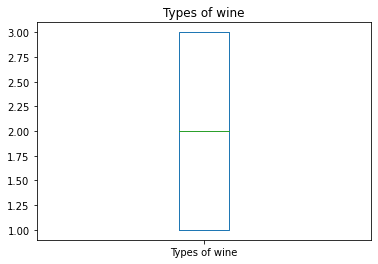

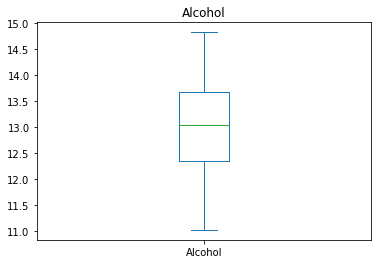

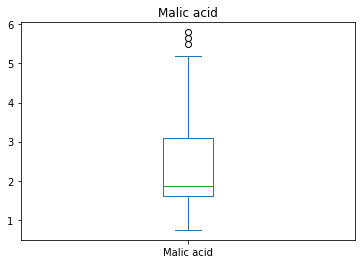

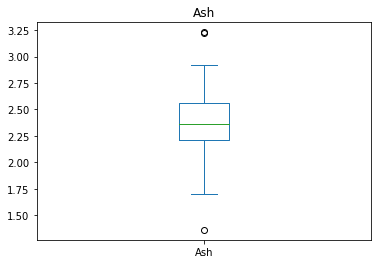

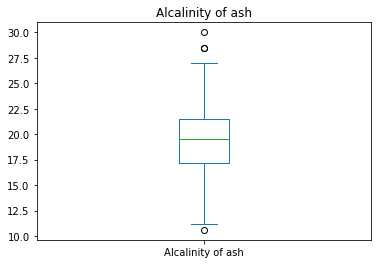

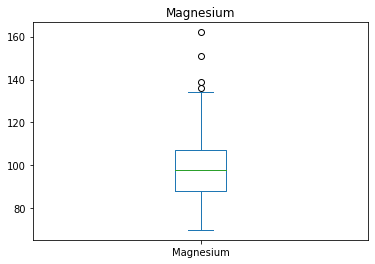

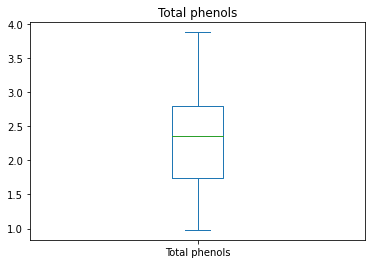

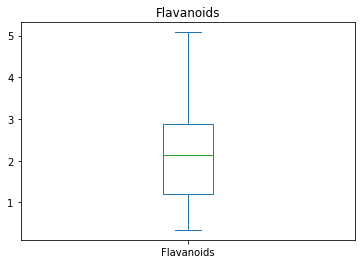

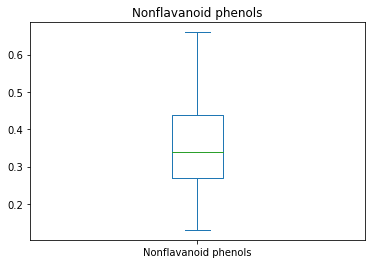

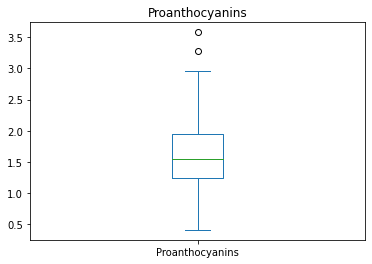

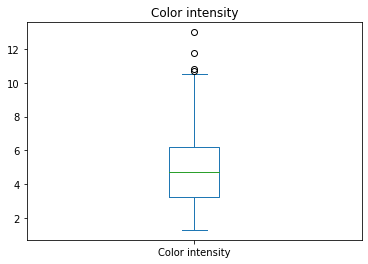

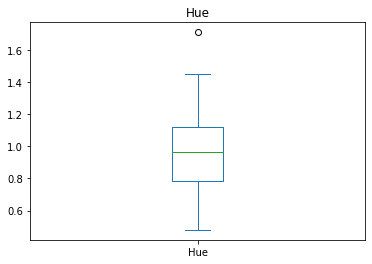

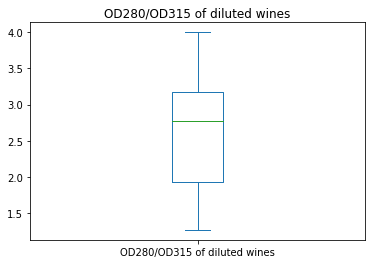

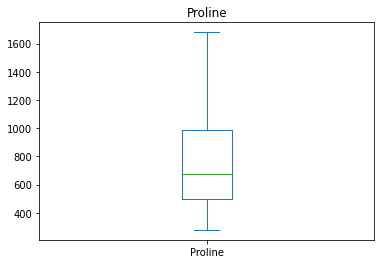

In [12]:
for column in df.columns:
    plt.figure()
    df[column].plot.box()
    plt.title(column)
    plt.show()

Podemos observar como las variables: **malic acid, ash, magnesium, proanthocyanins, color intensity y Hue** presentan outliers, por lo que esto nos determinará que usaremos **Robust Scaler** para su preprocesamiento. Sin embargo, al tener dudas sobre las variables 'Alcalinity of ash' y 'Hue', la cuales anteriormente dan como gaussianas, pero luego vemos que tienen outliers, realizamos un shapiro, para reforzar su clasificación:

In [13]:

print('Hipotesis nula (Ho): La muestra tiene una distribución normal (Probablemente Gaussiana).')
print('Hipotesis alternativa (H1): La muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')

for i in df.columns:
    shapiro_test = stats.shapiro(df[i])
    print('La variable', i, 'tiene un p-value= ', shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Se acepta la hipotesis nula, la muestra tiene una distribución normal (Probablemente Gaussiana).\n')
    else:
        print('Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')

Hipotesis nula (Ho): La muestra tiene una distribución normal (Probablemente Gaussiana).
Hipotesis alternativa (H1): La muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable Types of wine tiene un p-value=  3.526998097335039e-14
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable Alcohol tiene un p-value=  0.020050711929798126
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable Malic acid tiene un p-value=  2.94582247484243e-10
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable Ash tiene un p-value=  0.038691021502017975
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable Alcalinity of ash tiene un p-value=  0.26394858956336975
Se acepta la hipotesis nula, la muestra tiene una distribución normal (Pr

Ahora, definimos que la variable Hue se preprocesará a través de Robust Scaler.

En conclusión para preprocesar los datos utilizaremos:
- **Robust Scaler:** 'Malic acid', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color Intensity' y 'Hue'
- **Max Min Scaler:** 'Alcohol', 'Total phenols', 'Flavanoids', 'Non-flavanoids', 'OD280/OD315' y 'Proline'
- **Estandarización:** Únicamente para la variable 'Alcalinity of Ash'

Realizamos una copia antes de comenzar a realizar el preprocesamiento

In [14]:
df1 = df.copy()

**Aplicamos Robust Scaler para las variables con outliers**

In [15]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
df1 [['Malic acid', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']] = scaler.fit_transform(df1[['Malic acid', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']])

df1

,Types of wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,-0.104730,0.201439,15.6,1.526316,2.80,3.06,0.28,1.050000,0.318792,0.222222,3.92,1065
1,1,13.20,-0.057432,-0.633094,11.2,0.105263,2.65,2.76,0.26,-0.392857,-0.104027,0.251852,3.40,1050
2,1,13.16,0.334459,0.892086,18.6,0.157895,2.80,3.24,0.30,1.792857,0.332215,0.192593,3.17,1185
3,1,14.37,0.057432,0.402878,16.8,0.789474,3.85,3.49,0.24,0.892857,1.043624,-0.311111,3.45,1480
4,1,13.24,0.489865,1.467626,21.0,1.052632,2.80,2.69,0.39,0.378571,-0.124161,0.222222,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,2.557432,0.258993,20.5,-0.157895,1.68,0.61,0.52,-0.707143,1.010067,-0.962963,1.74,740
174,3,13.40,1.381757,0.345324,23.0,0.210526,1.80,0.75,0.43,-0.207143,0.875839,-0.785185,1.56,750
175,3,13.27,1.631757,-0.287770,20.0,1.157895,1.59,0.69,0.43,-0.292857,1.848993,-1.111111,1.56,835
176,3,13.17,0.489865,0.028777,20.0,1.157895,1.65,0.68,0.53,-0.135714,1.546980,-1.081481,1.62,840


**Aplicamos Min Max Scaler**

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
df1 [['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines', 'Proline']] = scaler1.fit_transform(df1[['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines', 'Proline']])
df1

,Types of wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,0.842105,-0.104730,0.201439,15.6,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,1,0.571053,-0.057432,-0.633094,11.2,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,1,0.560526,0.334459,0.892086,18.6,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,1,0.878947,0.057432,0.402878,16.8,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,1,0.581579,0.489865,1.467626,21.0,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.705263,2.557432,0.258993,20.5,-0.157895,0.241379,0.056962,0.735849,-0.707143,1.010067,-0.962963,0.172161,0.329529
174,3,0.623684,1.381757,0.345324,23.0,0.210526,0.282759,0.086498,0.566038,-0.207143,0.875839,-0.785185,0.106227,0.336662
175,3,0.589474,1.631757,-0.287770,20.0,1.157895,0.210345,0.073840,0.566038,-0.292857,1.848993,-1.111111,0.106227,0.397290
176,3,0.563158,0.489865,0.028777,20.0,1.157895,0.231034,0.071730,0.754717,-0.135714,1.546980,-1.081481,0.128205,0.400856


**Aplicamos estandarización**

In [19]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
df1[['Alcalinity of ash']] = scaler2.fit_transform(df1[['Alcalinity of ash']])
df1

,Types of wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,0.842105,-0.104730,0.201439,-1.169593,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,1,0.571053,-0.057432,-0.633094,-2.490847,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,1,0.560526,0.334459,0.892086,-0.268738,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,1,0.878947,0.057432,0.402878,-0.809251,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,1,0.581579,0.489865,1.467626,0.451946,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.705263,2.557432,0.258993,0.301803,-0.157895,0.241379,0.056962,0.735849,-0.707143,1.010067,-0.962963,0.172161,0.329529
174,3,0.623684,1.381757,0.345324,1.052516,0.210526,0.282759,0.086498,0.566038,-0.207143,0.875839,-0.785185,0.106227,0.336662
175,3,0.589474,1.631757,-0.287770,0.151661,1.157895,0.210345,0.073840,0.566038,-0.292857,1.848993,-1.111111,0.106227,0.397290
176,3,0.563158,0.489865,0.028777,0.151661,1.157895,0.231034,0.071730,0.754717,-0.135714,1.546980,-1.081481,0.128205,0.400856


In [20]:
df1.describe()

,Types of wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,1.780000e+02,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02,1.780000e+02,178.000000,178.000000,178.000000
mean,1.938202,0.518584,3.184786e-01,0.018754,0.000000,0.091662,0.453487,0.356386,0.437460,5.128411e-02,1.235201e-01,-0.022372,0.491460,0.334446
std,0.775035,0.213639,7.548284e-01,0.789479,1.002821,0.751710,0.215811,0.210730,0.234818,8.176555e-01,7.779483e-01,0.677249,0.260070,0.224613
min,1.000000,0.000000,-7.601351e-01,-2.877698,-2.671018,-1.473684,0.000000,0.000000,0.000000,-1.635714e+00,-1.144295e+00,-1.437037,0.000000,0.000000
25%,1.000000,0.350658,-1.773649e-01,-0.431655,-0.689137,-0.526316,0.262931,0.182489,0.264151,-4.357143e-01,-4.932886e-01,-0.540741,0.244505,0.158702
50%,2.000000,0.531579,-7.502679e-17,0.000000,0.001518,0.000000,0.474138,0.378692,0.396226,-1.587272e-16,1.491862e-16,0.000000,0.553114,0.282097
75%,3.000000,0.696711,8.226351e-01,0.568345,0.602088,0.473684,0.627586,0.534810,0.580189,5.642857e-01,5.067114e-01,0.459259,0.695971,0.504280
max,3.000000,1.000000,2.658784e+00,2.503597,3.154511,3.368421,1.000000,1.000000,1.000000,2.892857e+00,2.788591e+00,2.207407,1.000000,1.000000


Dividir los datos en train y test, separando también el target que será el type of wine

In [21]:
X= df1.drop(['Types of wine'], axis=1)  #es el precio en miles de dolares
y=df1[['Types of wine']]

print(X.shape, y.shape)

(178, 13) (178, 1)


Definimos los datos para el Training Test:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
4,0.581579,0.489865,1.467626,0.451946,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963
55,0.665789,-0.091216,0.287770,0.301803,0.947368,0.682759,0.514768,0.132075,1.278571,0.523490,0.044444,0.644689,0.600571
162,0.478947,0.949324,0.633094,0.752231,0.421053,0.231034,0.054852,0.886792,-0.850000,0.298658,-0.281481,0.307692,0.208274
141,0.613158,0.469595,-0.028777,0.151661,-0.473684,0.144828,0.033755,0.452830,-1.307143,0.305369,-0.785185,0.439560,0.358060
33,0.718421,-0.226351,0.978417,0.001518,1.789474,0.679310,0.506329,0.698113,-0.292857,0.238255,0.844444,0.633700,0.682596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.563158,0.489865,0.028777,0.151661,1.157895,0.231034,0.071730,0.754717,-0.135714,1.546980,-1.081481,0.128205,0.400856
99,0.331579,0.881757,-0.431655,-0.448909,-0.526316,0.644828,0.559072,0.603774,1.792857,-0.802013,1.348148,0.571429,0.091298
101,0.413158,-0.354730,-1.323741,-0.298767,-0.526316,0.162069,0.215190,0.301887,-0.292857,-0.751678,0.222222,0.549451,0.202568
8,1.000000,-0.152027,-0.546763,-1.650049,-0.052632,0.627586,0.556962,0.301887,0.607143,0.171141,0.340741,0.578755,0.547076


Con el test_size definimos que porcentaje vamos a usar para el Test Set (20%), y verificamos las dimensiones de los nuevos sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142, 1) (36, 1)


Ahora, que ya tenemos los datos divididos y preprocesados, podemos comenzar a crear 2 modelos de clasificación, de los cuales optamos por realizar: **Logistic regression y K-Nearest Neighbors (KNN)**

### Logistic Regression

La **regresión logística** es un modelo de análisis estadístico utilizado para predecir la probabilidad de ocurrencia de un evento binario, es decir, un evento que puede tener dos resultados posibles, como "sí" o "no", "verdadero" o "falso", etc. En lugar de predecir un valor continuo como en la regresión lineal, la regresión logística predice una probabilidad, que luego se puede usar para clasificar una muestra en una de las dos categorías.

La función principal de la regresión logística es calcular la probabilidad de ocurrencia de un evento binario dado un conjunto de características predictoras. Esto se hace utilizando una función logística, que transforma los valores de las características predictoras en valores comprendidos entre 0 y 1 que representan la probabilidad. Una vez que se han calculado las probabilidades, se pueden utilizar para hacer una predicción, por ejemplo, clasificar una muestra en una de las dos categorías basándose en si la probabilidad es mayor o menor que un umbral específico.

In [24]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=42)
lg.fit(X_train, y_train)

C:\Users\flore\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [25]:
y_pred_lg= lg.predict(X_test)
y_pred_lg

array([1, 3, 2, 1, 2, 3, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

### K-Nearest Neighbors (KNN)

El algoritmo **K-Nearest Neighbors (KNN)** es un método de clasificación o regresión que se basa en la idea de que un punto dado es similar a los puntos que están cerca de él. La idea detrás de KNN es que un punto dado probablemente pertenecerá a la misma clase que los K puntos más cercanos a él en el espacio de características.


La función principal de KNN es determinar la distancia entre las muestras de entrenamiento y una muestra de prueba, y luego seleccionar los K vecinos más cercanos. Una vez que se han seleccionado los K vecinos más cercanos, se utilizan para hacer una predicción. Para hacer una predicción en el caso de la clasificación, se puede tomar la clase más común entre los K vecinos más cercanos. Para hacer una predicción en el caso de la regresión, se puede calcular el promedio o la mediana de los valores de los K vecinos más cercanos.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

C:\Users\flore\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [27]:
y_pred_knn = knn.predict(X_test)

y_pred_knn

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 3, 1, 1, 3, 1, 1, 1], dtype=int64)

## Exercici 2

### Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

La **accuracy** es una métrica comúnmente utilizada en el aprendizaje automático para evaluar la precisión de un modelo. Se define como la fracción de predicciones correctas sobre el total de predicciones realizadas.

En términos simples, la accuracy mide qué porcentaje de las predicciones hechas por el modelo son correctas. Por ejemplo, si un modelo hace 100 predicciones y 90 de ellas son correctas, su accuracy sería de 0,9 o 90%.

Es importante tener en cuenta que la accuracy no siempre es la mejor métrica para evaluar la precisión de un modelo, especialmente cuando las clases son desequilibradas o cuando es importante penalizar de manera distinta los errores de distinto tipo. En estos casos, pueden ser más apropiadas otras métricas, como la matriz de confusión, la precisión, el recall o la F1-score.

In [28]:
acc_lr = lg.score(X_test, y_test)
acc_KNN = knn.score(X_test, y_test)

In [29]:
metricas = pd.DataFrame( data = [['Logistic Regression', acc_lr],
                                ['KNN', acc_KNN]],
                                 columns = ['Modelo', 'Accuracy'])
metricas.head()

,Modelo,Accuracy
0,Logistic Regression,0.916667
1,KNN,0.916667


Podemos concluir que los valores de ambos son favorables

### Matriz de confusión para Logistic Regression

La matriz de confusión es una herramienta comúnmente utilizada en el aprendizaje automático para evaluar el desempeño de un modelo de clasificación. La matriz de confusión representa la cantidad de veces que el modelo hizo una predicción correcta o incorrecta para cada clase.

La matriz de confusión es una tabla 2x2 que contiene los siguientes cuatro elementos:

Verdaderos Positivos (VP): El número de muestras que el modelo clasificó correctamente como positivas.

Falsos Positivos (FP): El número de muestras que el modelo clasificó como positivas, pero que en realidad eran negativas.

Verdaderos Negativos (VN): El número de muestras que el modelo clasificó correctamente como negativas.

Falsos Negativos (FN): El número de muestras que el modelo clasificó como negativas, pero que en realidad eran positivas.

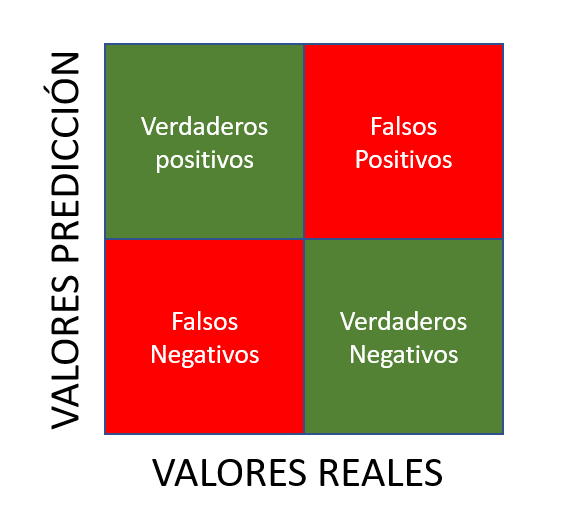

In [30]:
from sklearn.metrics import confusion_matrix

mc_lg= confusion_matrix(y_test, y_pred_lg)
print("Matriz de Confusión:")
print(mc_lg)

Matriz de Confusión:
[[14  0  0]
 [ 1 13  2]
 [ 0  0  6]]


Cada fila representa una clase real y cada columna representa una clase predicha por el modelo.

La diagonal principal de la matriz contiene los valores verdaderos positivos (VP) o, en otras palabras, los casos en los que el modelo hizo una predicción correcta. Los valores fuera de la diagonal representan los casos en los que el modelo hizo una predicción incorrecta: los falsos positivos (FP) y los falsos negativos (FN).

Podemos decir que el modelo predijo correctamente 14 casos para la primera clase.
Para la segunda clase, el modelo predijo correctamente 13 casos, pero cometió 2 falsos positivos.
Para la tercera clase, el modelo hizo 6 predicciones correctas y 0 falsos positivos o falsos negativos.

Tiene un buen desempeño en general, especialmente para la primera y tercera clase, pero tiene dificultades para predecir la segunda clase. Para obtener una evaluación más completa del desempeño del modelo, se pueden calcular otras métricas como la precisión, el recall, la F1-score y el AUC-ROC.

### Matriz de confusión de modelo KNN

In [31]:
mc_knn = confusion_matrix(y_test, y_pred_knn)

print("Matriz de Confusión:")
print(mc_knn)

Matriz de Confusión:
[[14  0  0]
 [ 2 13  1]
 [ 0  0  6]]


En este caso, podemos ver que el modelo ha clasificado correctamente 14 observaciones de la clase 0, 13 observaciones de la clase 1 y 6 observaciones de la clase 2. Sin embargo, también se han clasificado incorrectamente 2 observaciones de la clase 1 como la clase 0 y 1 observación de la clase 2 como la clase 1.

### F1 SCORE


El f1-score es una métrica de rendimiento comúnmente utilizada para evaluar modelos de clasificación. Es una combinación de dos métricas, la precisión y el recall, y mide la armonía entre ambas.

La precisión mide cuán correctamente el modelo está clasificando las observaciones en cada clase. Por otro lado, el recall mide cuántas observaciones reales de una clase determinada el modelo ha identificado correctamente.

En otras palabras, un buen f1-score significa que tanto la precisión como el recall son altos. Por lo tanto, el f1-score es una métrica útil para evaluar modelos de clasificación cuando existe un desequilibrio en el tamaño de las clases o cuando es importante equilibrar la precisión y el recall.



In [32]:
from sklearn.metrics import f1_score

f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
f1_lg = f1_score(y_test, y_pred_lg, average='weighted')

El argumento **average='weighted'** indica que se desea calcular un promedio ponderado, es decir, se pondera cada f1-score por el tamaño de su clase correspondiente. De esta manera, se tiene en cuenta el desequilibrio en el tamaño de las clases y se puede tener una visión más justa del rendimiento del modelo.

Si en cambio se especifica **average='macro'**, se calcularía el promedio simple de los f1-scores de cada clase, sin tener en cuenta el tamaño de las clases. Esta opción puede ser adecuada en casos en los que todas las clases tienen un tamaño similar o en los que no es importante tener en cuenta el desequilibrio en el tamaño de las clases.

In [60]:
metricas_f1 = pd.DataFrame( data = [['Logistic Regression', acc_lr, f1_lg],
                                ['KNN', acc_KNN, f1_knn]],
                       columns = ['Modelo', 'Accuracy', 'F1'])
metricas_f1

,Modelo,Accuracy,F1
0,Logistic Regression,0.916667,0.916804
1,KNN,0.916667,0.915277


## Exercici 3

### Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

#### Mejora parámetros Logistic Regresion

In [67]:
y_train

,Types of wine
161,3
92,2
94,2
174,3
24,1
...,...
103,2
67,2
117,2
47,1


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lg_bp = LogisticRegression(random_state=42)
lg_bp.fit(X_train,y_train.values.ravel())
y_pred_lg_bp = lg_bp.predict(X_test) 

y_pred_lg_bp

array([1, 3, 2, 1, 2, 3, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [38]:
lg_bp.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [39]:
from pprint import pprint
print('Parámetros:')
pprint(lg_bp.get_params())

Parámetros:
{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear','saga']
param_grid['penalty'] = ["l1", "l2", "elasticnet"]

In [85]:
# Crear un objeto de GridSearchCV
import warnings 
warnings.filterwarnings('ignore')
## DECLARAR OTRA VEz
search = GridSearchCV(lg_bp, param_grid, scoring = 'f1_macro')

## TODO 
# Entrenar el modelo con GridSearchCV
search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']},
             scoring='f1_macro')

In [84]:
# Revisar los resultados
print("Mejores Hyper-parameters: ", search.best_params_)

Mejores Hyper-parameters:  {'penalty': 'l1', 'solver': 'liblinear'}


#### Mejora parámetros K-Nearest Neighbors

In [86]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

knn = KNeighborsClassifier()

search_knn = GridSearchCV(knn, param_grid, scoring = 'f1_macro')
search_knn2=search_knn.fit(X_train, y_train)

In [87]:
search_knn2.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

## Exercici 4

### Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

In [88]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=search_knn2.best_params_['n_neighbors'],
                           weights=search_knn2.best_params_['weights'],
                           p=search_knn2.best_params_['p'])

scores = cross_val_score(knn_cv, X, y, cv=5, scoring='f1_macro')

print("Cross Validation Score: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Cross Validation Score: 0.94 +/- 0.04


In [90]:
logreg = LogisticRegression(solver=search.best_params_['solver'],
                            penalty=search.best_params_['penalty'])

scores_lg = cross_val_score(logreg, X, y, cv=5, scoring='f1_macro')

print("Cross Validation Score: {:.2f} +/- {:.2f}".format(scores_lg.mean(), scores.std()))

#usamos una validacion cruzada de 5 aprtes, cv=5

Cross Validation Score: 0.95 +/- 0.04


Podemos ver como la validación cruzada nos da con muy buenos valores de entre 0.95 y 0.94 para ambos tipos, pudiendo igualemtne decir que la regresión logística es mejor

## Exercici 5

### Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

Ya se ha realizado previamente, antes de comenzar a tratar los datos